複習一些過往的code並慢慢整理自己的codebase，並且養成每日寫data science code的習慣!

## 目標: 將過往code文件化、模組化，使其重複使用。

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine

In [200]:
# 使用官方資料，只是示意

data = load_wine(as_frame=True)
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [201]:
X = data['data']
y = data['target']

Day1
## Q: 如何知道資料的 row 數以及 column 數、有什麼欄位、多少欄位、如何截取部分的資料等等


In [202]:
# row
print(X.shape[0], len(X))
print(y.shape[0], len(y))

# column
print(X.shape[1])

# 欄位
print(X.columns)

# 多少欄位
print(X.shape[1], len(X.columns))

# 擷取部分資料
print(X.iloc[0, 0])

178 178
178 178
13
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
13 13
14.23


In [203]:
# 也可以直接使用info

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [204]:
# 取得各數值的counts，常使用在類別資料上(可以看到滿平衡的！)

y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Day2
## Q: 找出欄位最大、最小值的「位置」

In [205]:
# 找出每欄位最大值的位置

X.iloc[:, 0].idxmax()

8

In [206]:
print(X.iloc[8, 0])
print(max(X.iloc[:, 0]))

14.83
14.83


In [207]:
# 找出每欄位最小值的位置

X.iloc[:, 0].idxmin()

115

In [208]:
print(X.iloc[115, 0])
print(min(X.iloc[:, 0]))

11.03
11.03


## Q: 最基本的類別特徵轉換方法: one-hot encoding

In [209]:
# 建立簡單的資料來使用
data = {
    'city': ['Taipei', 'LA', 'WC']
}
X = pd.DataFrame(data)
X

,city
0,Taipei
1,LA
2,WC


In [210]:
# 1. 使用pd.get_dummies

pd.get_dummies(X)

,city_LA,city_Taipei,city_WC
0,0,1,0
1,1,0,0
2,0,0,1


In [211]:
# 2. sklearn one-hot encoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit_transform(X)   # 記得這會變成sparse_matrix, 比較節省空間！

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [212]:
# 可以透過toarray取得ndarray，但沒有保持著dataframe
one_hot_encoder.fit_transform(X).toarray() 

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [213]:
# 可以進一步轉換回去，就跟 pd.get_dummies相同了！

pd.DataFrame(one_hot_encoder.fit_transform(X).toarray())

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


Day3
## Q: 找出不同類型的特徵，並操作、觀察

In [214]:
# 建造int、float、object型態的欄位
data = {
    'city': ['Taipei', 'LA', 'WC'],
    'age': [20, 30, 40],
    'height': [1.80, 1.70, 2.0]
}
X = pd.DataFrame(data)
X

,city,age,height
0,Taipei,20,1.8
1,LA,30,1.7
2,WC,40,2.0


In [215]:
# 透過這個語法可以得到df的欄位以及欄位型態
X_dtypes = X.dtypes.reset_index()
X_dtypes

,index,0
0,city,object
1,age,int64
2,height,float64


In [216]:
# 但需要將欄位名稱轉換會比較清楚
X_dtypes.columns = ['count', 'column_type']

# 去得到counts
X_dtypes.groupby('column_type').count().reset_index()

,column_type,count
0,int64,1
1,float64,1
2,object,1


In [217]:
# 藉此，可以根據不同型態去針對處理(如果剛好是這樣的處理方法)
int_columns = []
float_columns = []
object_columns = []

for dtype, column_name in zip(X.dtypes, X.columns):
    if dtype == 'int64':
        int_columns.append(column_name)
    elif dtype == 'float64':
        float_columns.append(column_name)
    else:
        object_columns.append(column_name)
        
print('int:', int_columns)
print('float:', float_columns)
print('object:', object_columns)


int: ['age']
float: ['height']
object: ['city']


**後續就可以針對去進行操作**

Day4
## Q: 找出欄位的統計量

In [218]:
# 平均數
print(X['age'].mean())

# 標準差
print(X['age'].std())

30.0
10.0


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40.]),
 <a list of 10 Patch objects>)

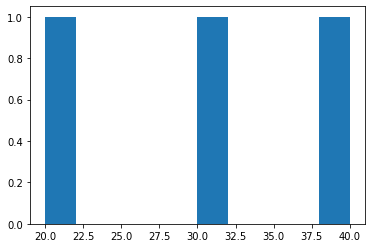

In [219]:
# 任意欄位的直方圖

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(X['age'])

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([1.7 , 1.73, 1.76, 1.79, 1.82, 1.85, 1.88, 1.91, 1.94, 1.97, 2.  ]),
 <a list of 10 Patch objects>)

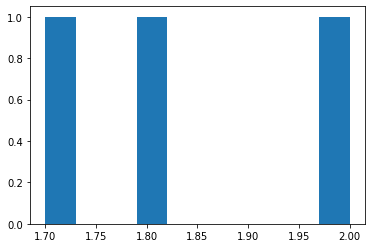

In [220]:
plt.hist(X['height'])

Day4
## Q: outlier

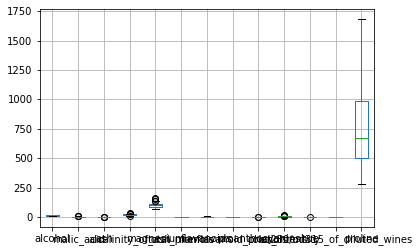

In [221]:
data = load_wine(as_frame=True)
X = data['data']

# 直接取得所有欄位的boxplot(刻度差不多時，適合使用)
X.boxplot()

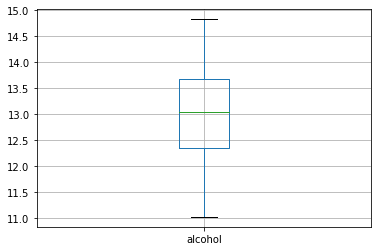

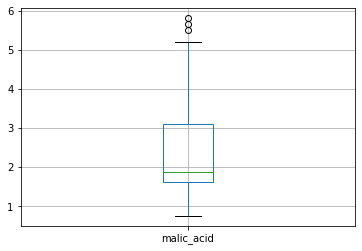

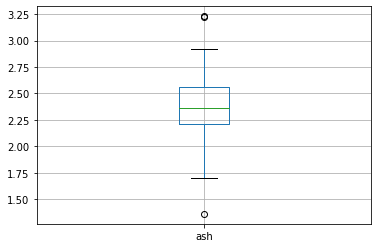

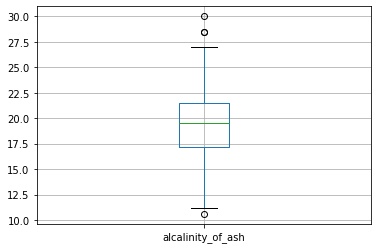

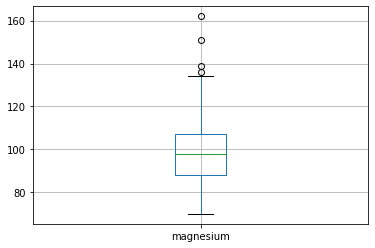

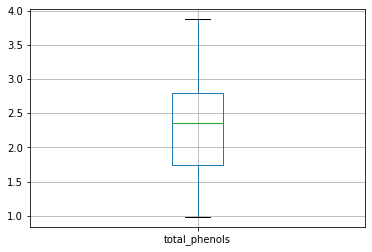

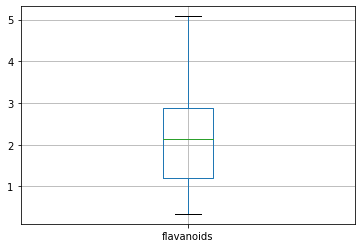

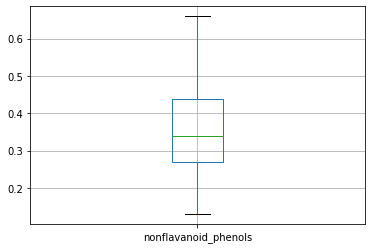

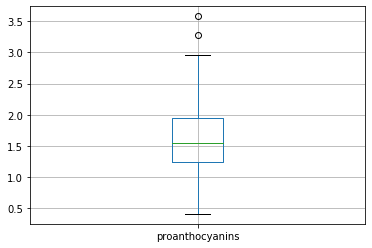

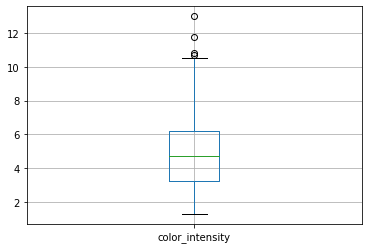

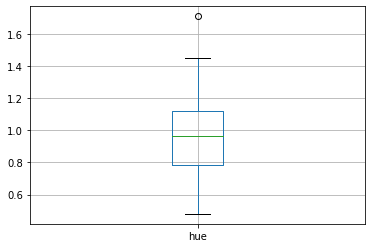

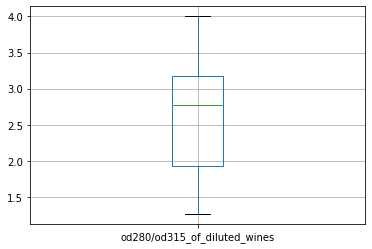

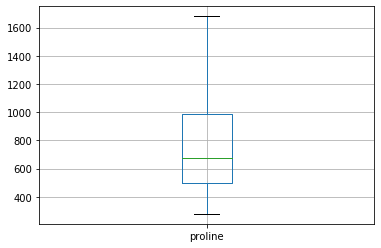

In [222]:
# 取得各自欄位的boxplot

for column in X.columns:
    plt.figure()
    X.boxplot(column=column)

以上可以在視覺上更好直接觀察到眾多數字的概況。

Day5
## Q: 如何看出實際資料累積狀況

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'ECDF')

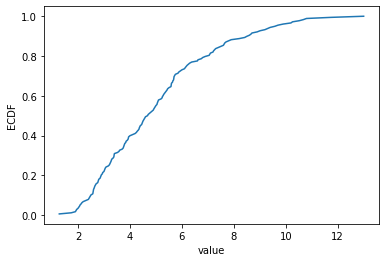

In [223]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
# 以color_intensity 欄位為例

# 1. 取得資料
cdf = X['color_intensity']

# 2. 排序並算出累次數累積資料
cdf = cdf.value_counts().sort_index().cumsum()

# 3. 畫圖
plt.plot(cdf.index, cdf / cdf.max())
plt.xlabel('value')
plt.ylabel('ECDF')

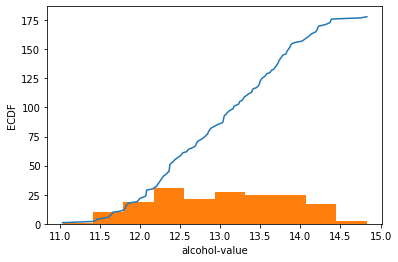

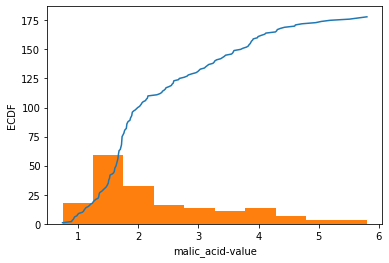

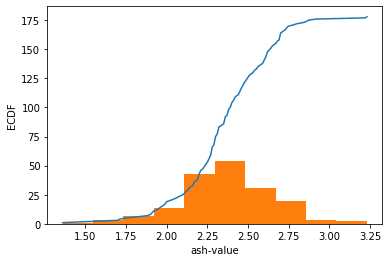

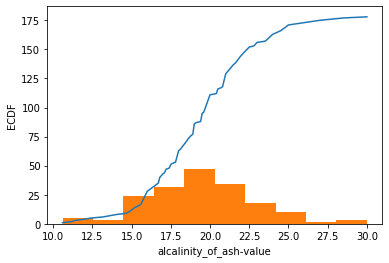

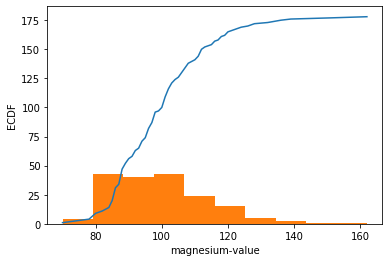

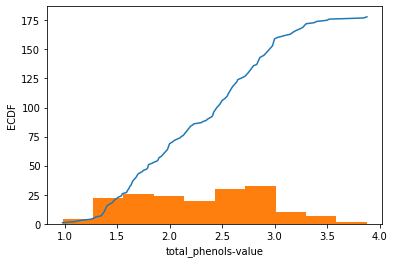

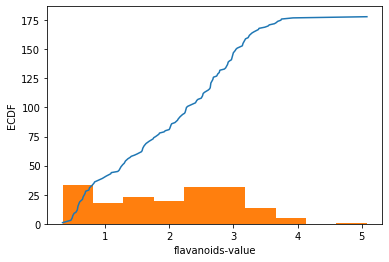

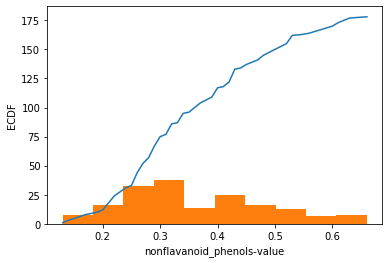

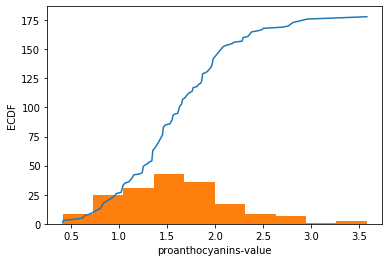

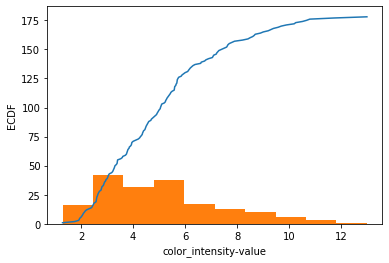

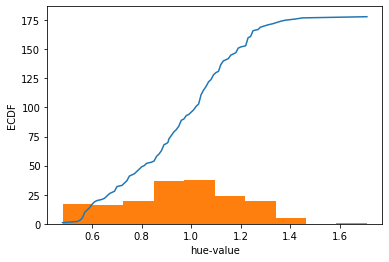

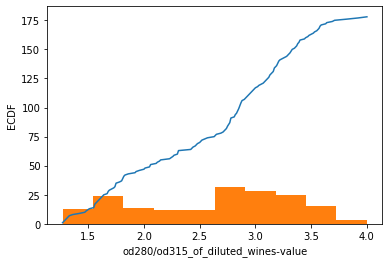

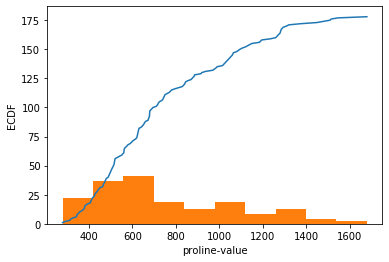

In [224]:
# 畫出各個圖的ecdf

for column in X.columns:
    # 1. 取得資料
    cdf = X[column]
    
    # 2. 排序並計算累積次數
    cdf = cdf.value_counts().sort_index().cumsum()
    
    # 3. 畫圖(搭配hist會更好看出分配)
    plt.figure()
    #plt.plot(cdf.index, cdf / cdf.max())
    plt.plot(cdf.index, cdf)
    plt.hist(X[column])
    plt.xlabel(f'{column}-value')
    plt.ylabel('ECDF')
    

> 可以看出，越像均勻分配的會越靠進對角線；如果次數分配大多在較小數字，曲線會起得更早；反之則是後期才會陡峭。

Day6
## Q: 針對outlier的處置方式
1. 將離群值限縮
2. 將離群值刪除

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [226]:
y = data['target']
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [227]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

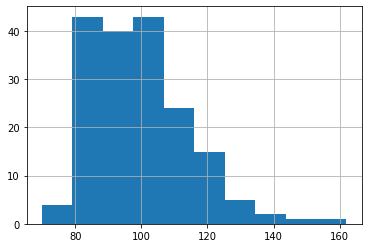

In [228]:
# 以color_intensity為例
X['magnesium'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6d62fd2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6d62fd9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6d62eeeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6d62fddd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6d63073c8>],
 'means': []}

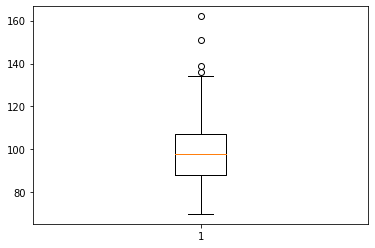

In [229]:
plt.boxplot(X['magnesium'])

In [230]:
# 找出統計量
X['magnesium'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

可以看出大約135以上就是outlier了。

In [231]:
# 原始狀態不變動 使用 LR建模

lr = LogisticRegression()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# 訓練
print(cross_val_score(lr, scaled_X, y).mean(0))

0.9776190476190475


In [232]:
# 1. 限縮範圍

# 使用clip可以先縮範圍
X['magnesium'] = X['magnesium'].clip(upper=135)
scaled_X_clip = scaler.fit_transform(X)

# 訓練
lr = LogisticRegression()
print(cross_val_score(lr, scaled_X_clip, y).mean())

0.9777777777777779


C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [233]:
# 2. 直接去除

keep_index = X['magnesium'] <= 135
X_remove = X[keep_index]
y_remove = y[keep_index]

# 訓練
lr = LogisticRegression()
print(cross_val_score(lr, X_remove, y_remove).mean())

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

0.961111111111111


可以看到該欄位為例，限縮範圍稍微好一些，而刪除資料通常會少了訊息，要謹慎使用，除非outlier很明顯，不然使用限縮都會好一些!

Day 7
## Q: 更多處理outlier的方式

In [234]:
# 1. 百分位數補值
# 找出某欄位的全部百分位數
qs = []

for q in range(101):
    qs.append(np.percentile(X['malic_acid'], q=q))

    
pd.DataFrame({'q': list(range(101)), 'value': qs})

,q,value
0,0,0.7400
1,1,0.8977
2,2,0.9308
3,3,0.9524
4,4,0.9916
...,...,...
96,96,4.6092
97,97,4.8787
98,98,5.1090
99,99,5.5422


In [235]:
X['malic_acid'].describe()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64

In [236]:
# 2. 中位數
qs[50]

1.8650000000000002

In [237]:
# 3. 眾數
from scipy.stats import mode

mode(X['malic_acid'])#[0][0]

ModeResult(mode=array([1.73]), count=array([7]))

In [238]:
# 驗證

X['malic_acid'].value_counts()

1.73    7
1.67    4
1.81    4
1.53    3
1.51    3
       ..
3.24    1
5.51    1
1.76    1
1.09    1
2.55    1
Name: malic_acid, Length: 133, dtype: int64

Day7

## Q: 不同標準化方法的差別
- Z轉換
- MinMax轉換
- log轉換

In [239]:
# z轉換
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression()
z_scaler = StandardScaler()
scaled_X_z = z_scaler.fit_transform(X)

# 訓練
print(cross_val_score(lr, scaled_X_z, y).mean())

0.9833333333333332


In [240]:
# MinMax轉換

lr = LogisticRegression()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# 訓練
print(cross_val_score(lr, scaled_X, y).mean())

0.9777777777777779


In [241]:
# Log轉換

lr = LogisticRegression()
scaled_X_log = np.log(X)

# 訓練
print(cross_val_score(lr, scaled_X_log, y).mean())

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

0.972063492063492


C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


實際上需要去看原始資料的分配，一概而論可能不太合適。

Day8
## Q: 常用的dataframe操作
- cut
- merge
- subset
- groupby

In [242]:
X['magnesium'].describe()

count    178.000000
mean      99.471910
std       13.384019
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      135.000000
Name: magnesium, dtype: float64

In [243]:
# cut: 將連續性拆成一個個區間

cut_rule = [X['magnesium'].min(), 75, 80, 100, X['magnesium'].max()]

X['magnesium_groupby'] = pd.cut(x=X['magnesium'],bins=cut_rule, include_lowest=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,magnesium_groupby
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,"(100.0, 135.0]"
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,"(80.0, 100.0]"
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,"(100.0, 135.0]"
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,"(100.0, 135.0]"
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,"(100.0, 135.0]"


In [244]:
X['magnesium_groupby'].value_counts()

(80.0, 100.0]     91
(100.0, 135.0]    78
(75.0, 80.0]       8
(69.999, 75.0]     1
Name: magnesium_groupby, dtype: int64

以上就可以輕鬆得到區間！對於連續型資料離散化非常有幫助!

In [245]:
# 搭配cut可以得到不錯的效果!
X.groupby('magnesium_groupby')['color_intensity'].mean()

magnesium_groupby
(69.999, 75.0]    1.740000
(75.0, 80.0]      3.691250
(80.0, 100.0]     4.758901
(100.0, 135.0]    5.589872
Name: color_intensity, dtype: float64

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


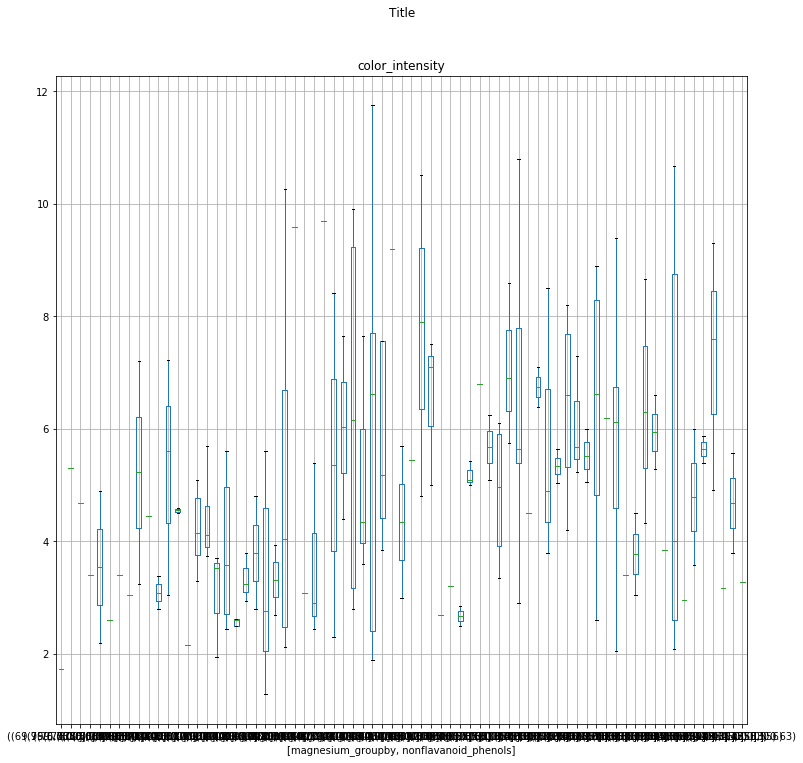

In [246]:
# boxplot 進階版本: 每幾個欄位當x軸組合，y軸則是關心的分布，適合用在類別資料上(x軸)

plt_column = ['color_intensity']
plt_by = ['magnesium_groupby','nonflavanoid_phenols']

X.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('Title')
plt.show()

Day9
## Q: 相關性的表示

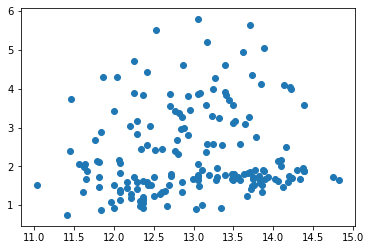

In [247]:
# 利用scatter plot 畫出兩變數分布給出直觀視覺化(單一組)

plt.scatter(x=X['alcohol'], y=X['malic_acid'])

In [248]:
# dataframe可以直接取得所有變數的相關性

X.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.303375,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.041464,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.327125,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.086506,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.303375,-0.041464,0.327125,-0.086506,1.000000,0.227422,0.209867,-0.255526,0.205999,0.233436,0.036693,0.063848,0.412215
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.227422,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.209867,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.255526,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.205999,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.233436,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


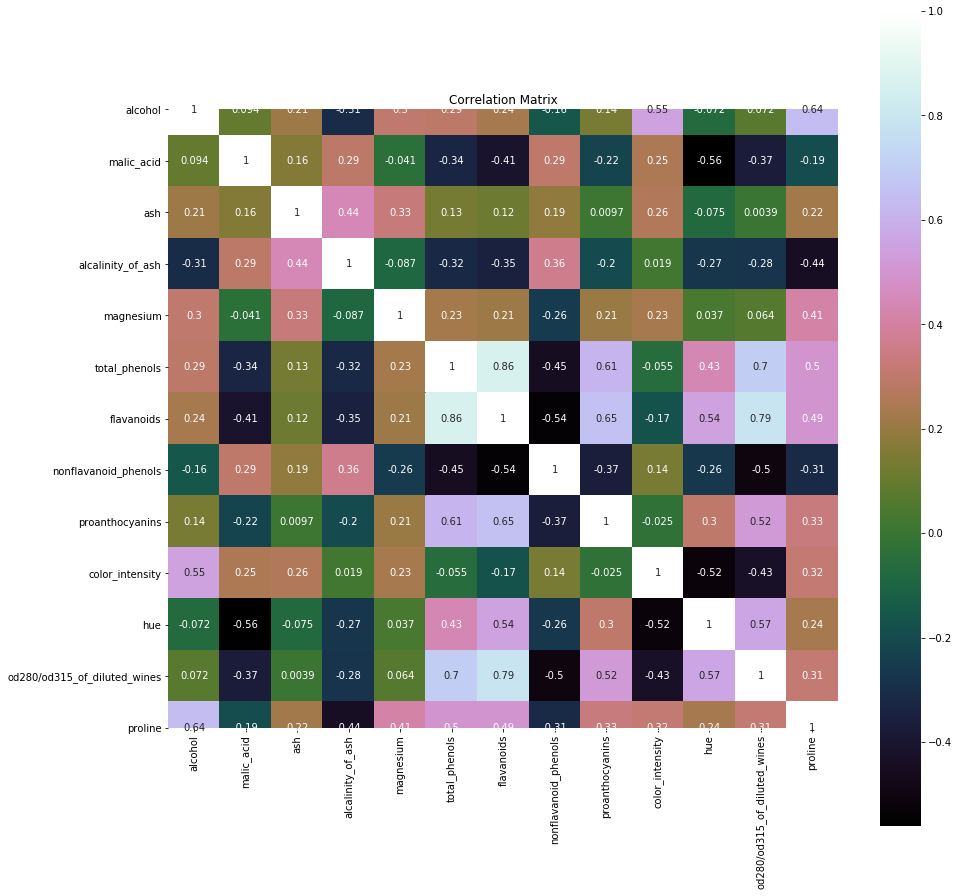

In [249]:
# 搭配sns可以一次畫出全部

# correlation
correlation = X.corr()
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [250]:
# 也可以用np來計算相關係數

np.corrcoef(x=X.iloc[:, 0], y=X.iloc[:, 2])

array([[1.       , 0.2115446],
       [0.2115446, 1.       ]])

In [251]:
# 運用pandas 來更多使用相關係數, 得出單一欄位對其他欄位的相關係數

X.corr()['alcohol']

alcohol                         1.000000
malic_acid                      0.094397
ash                             0.211545
alcalinity_of_ash              -0.310235
magnesium                       0.303375
total_phenols                   0.289101
flavanoids                      0.236815
nonflavanoid_phenols           -0.155929
proanthocyanins                 0.136698
color_intensity                 0.546364
hue                            -0.071747
od280/od315_of_diluted_wines    0.072343
proline                         0.643720
Name: alcohol, dtype: float64

In [252]:
# 上面可能因為數字太多不好觀察，通常可以再去搭配排序

# top n
top_n = 3
print(X.corr()['alcohol'].sort_values()[::-1][:top_n])  # 降冪

alcohol            1.000000
proline            0.643720
color_intensity    0.546364
Name: alcohol, dtype: float64


In [253]:
print(X.corr()['alcohol'].sort_values()[::][:top_n])  # 升冪

alcalinity_of_ash      -0.310235
nonflavanoid_phenols   -0.155929
hue                    -0.071747
Name: alcohol, dtype: float64


In [254]:
# 當然其實相關性正負是方向性的問題，所以更多時候會去更絕對值

print(abs(X.corr()['alcohol']).sort_values()[::][:top_n])  # 升冪

hue                             0.071747
od280/od315_of_diluted_wines    0.072343
malic_acid                      0.094397
Name: alcohol, dtype: float64


In [255]:
print(abs(X.corr()['alcohol']).sort_values()[::-1][:top_n+1])  # 降冪

alcohol              1.000000
proline              0.643720
color_intensity      0.546364
alcalinity_of_ash    0.310235
Name: alcohol, dtype: float64


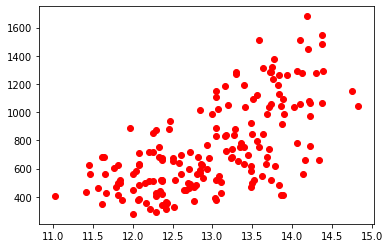

In [256]:
# 根據以上，我們可以去看看對應前幾個的欄位去看分布, 搭配顏色區分

plt.scatter(X['alcohol'], y=X['proline'], c='red')

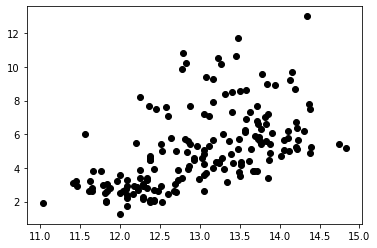

In [257]:
plt.scatter(X['alcohol'], y=X['color_intensity'], c='black')


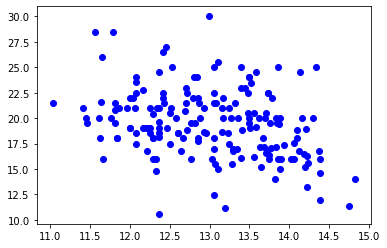

In [258]:
plt.scatter(X['alcohol'], y=X['alcalinity_of_ash'], c='blue')

Day10
## Q: 將連續型變數離散化並觀察

In [259]:
X['proline'].describe()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: proline, dtype: float64

# 連續型變數切成離散區塊

cut_intervals = [i for i in range(278, 1800, 300)]
X['proline_groups'] = pd.cut(X['proline'], bins=cut_intervals)
X['proline_groups']

In [261]:
# 變成類別就可以觀察次數分配

X['proline_groups'].value_counts()

(278, 578]      65
(578, 878]      58
(878, 1178]     31
(1178, 1478]    18
(1478, 1778]     5
Name: proline_groups, dtype: int64

In [262]:
# 根據該組別去計算其他特徵的平均，可以看出組別之間的大致差異

X['y'] = y
X.groupby('proline_groups').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
proline_groups,,,,,,,,,,,,,,
"(278, 578]",12.512000,2.466615,2.288154,20.804615,92.569231,2.068000,1.788308,0.386000,1.472462,4.096615,0.939538,2.495385,455.230769,1.261538
"(578, 878]",12.921724,2.643793,2.399828,19.987931,101.568966,2.032759,1.455517,0.401379,1.433966,5.706724,0.865793,2.288103,700.068966,1.362069
"(878, 1178]",13.567419,1.936129,2.376129,17.638710,105.612903,2.777419,2.798065,0.286129,1.889355,5.051290,1.047097,3.130000,1022.193548,0.161290
"(1178, 1478]",13.786667,1.779444,2.535556,17.238889,105.777778,2.857222,2.998889,0.310000,1.831667,5.962778,1.092778,3.027778,1280.833333,0.000000
"(1478, 1778]",14.124000,1.846000,2.404000,16.480000,106.800000,3.252000,3.514000,0.258000,2.266000,7.330000,1.126000,3.064000,1546.400000,0.000000


Day10
## Q: 連續型變數離散化，可再丟入模型，粒度會比較大。

In [269]:
onehot = OneHotEncoder()
onehot.fit_transform(X[['proline_groups']])

<178x6 sparse matrix of type '<class 'numpy.float64'>'
	with 178 stored elements in Compressed Sparse Row format>

Day11
## Reconstructing Time

In [278]:
def plot_every_boxplot(df):
    """
        透過 boxplot 觀察所有特徵之特徵分布。
    """
    not_continuous_features = []
    
    for column in df.columns:
        plt.figure()
        try:
            df.boxplot(column=column)
            plt.title(f'{column} std: {df[column].std()}')
        except:
            plt.title(f'column {column} is not continuous.')
            not_continuous_features.append(column)
    return not_continuous_features


def plot_every_ecdf(df):
    """
        繪製 Empirical Cumulative Density Plot (ECDF) 觀察各欄位特徵值累積狀況。
    """
    
    for column in df.columns:
        plt.figure()
        # 1. 取得資料
        cdf = df[column]

        # 2. 排序並算出累次數累積資料
        cdf = cdf.value_counts().sort_index().cumsum()

        # 3. 畫圖
        plt.plot(cdf.index, cdf / cdf.max())
        plt.xlabel('value')
        plt.ylabel('ECDF')
        plt.title(f'column: {column}')

['magnesium_groupby', 'proline_groups']

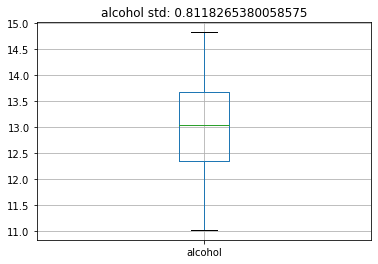

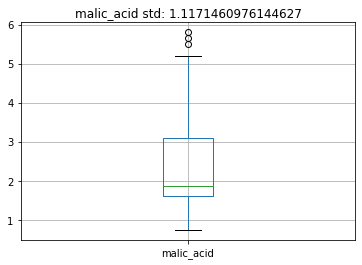

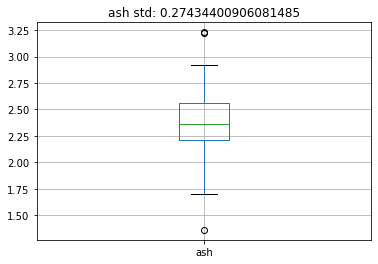

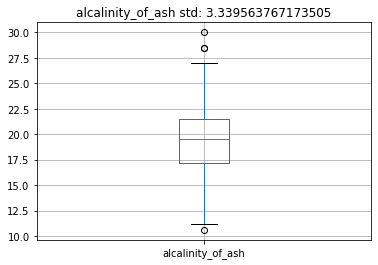

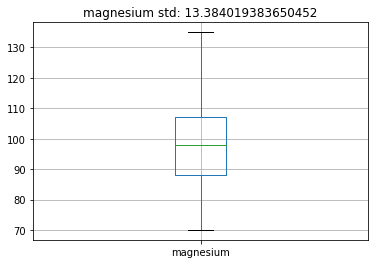

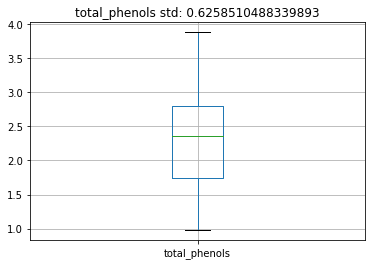

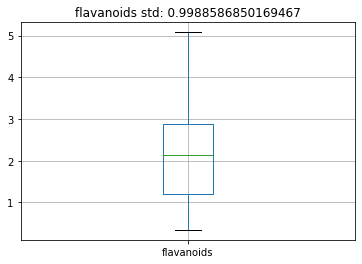

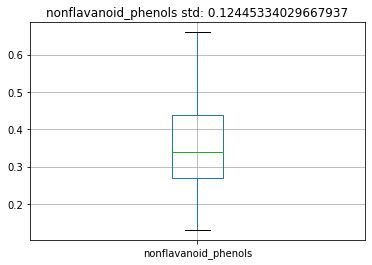

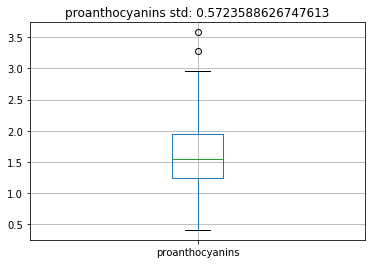

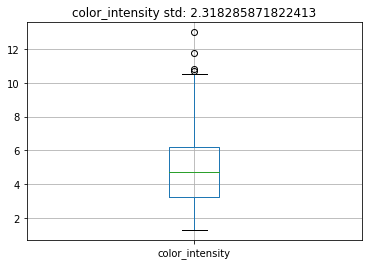

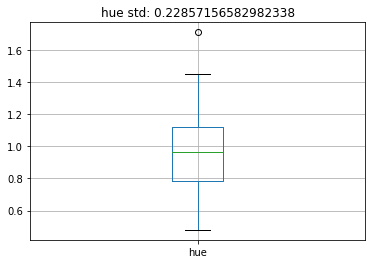

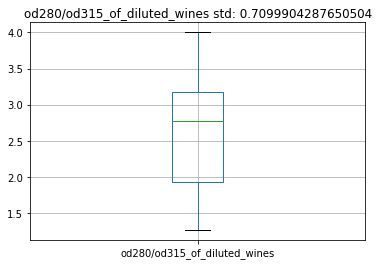

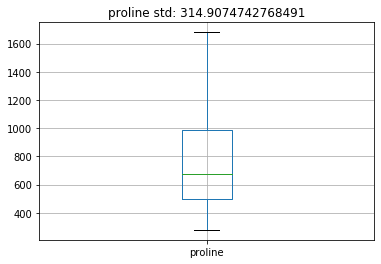

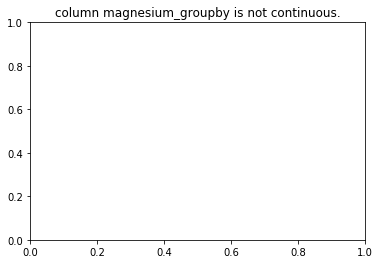

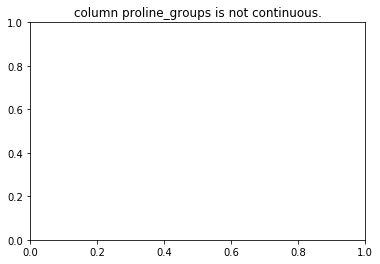

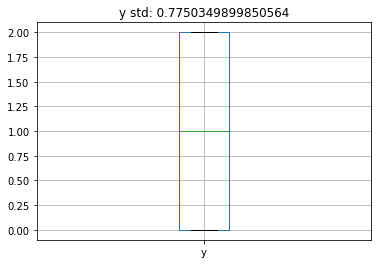

In [277]:
plot_every_boxplot(X)

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexes\extension.py:238: FutureWarning: Sup

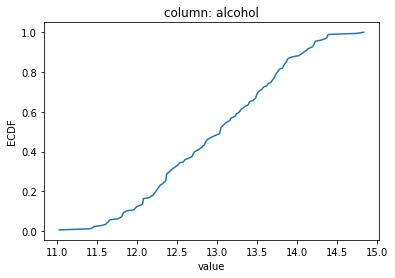

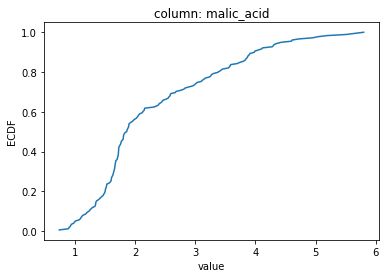

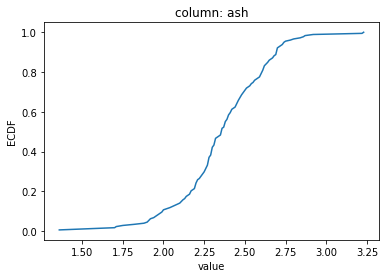

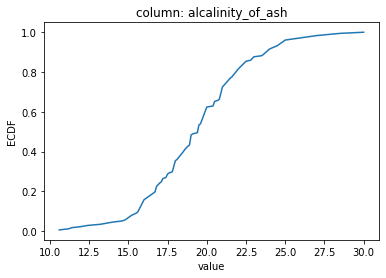

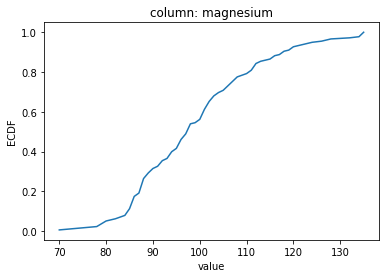

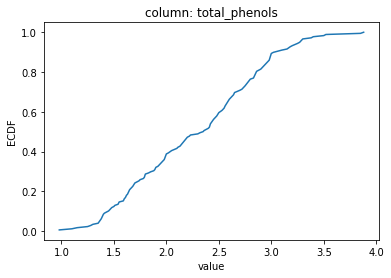

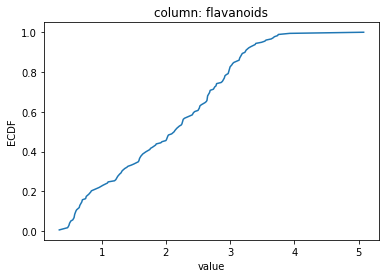

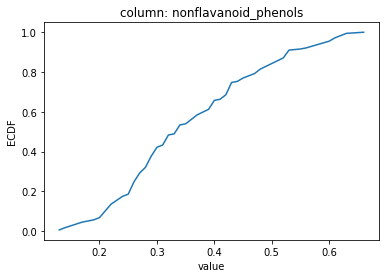

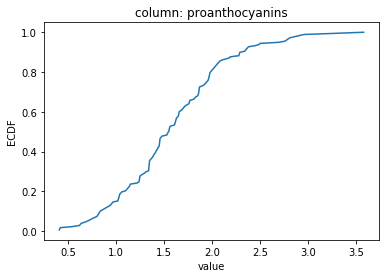

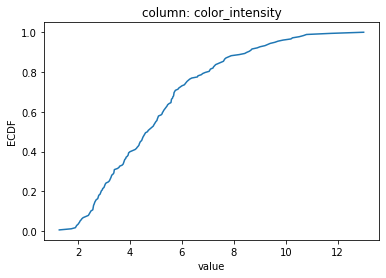

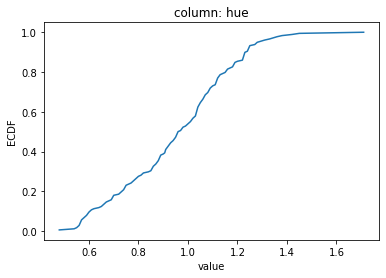

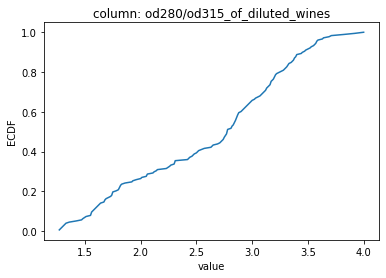

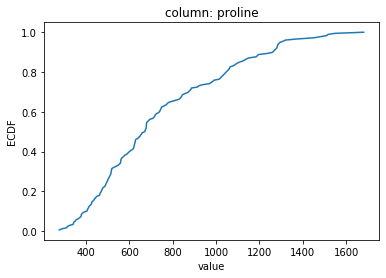

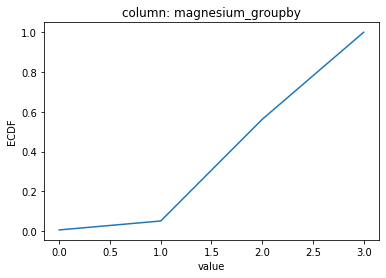

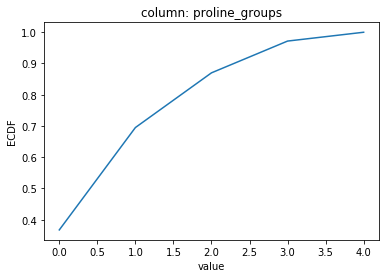

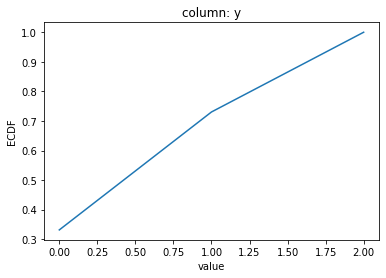

In [280]:
plot_every_ecdf(X)